In [513]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency

In [515]:
file_path = 'ApexPlayerRetention_DataWrangling.csv'

In [517]:
df = pd.read_csv('ApexPlayerRetention_DataWrangling.csv')

In [519]:
df.head()

,date,game,map,match_type,my_duration,my_rank,rp_earned,premade_squad,voice_chat,squad_placed,...,my_knocks,teamate_1_knocks,teamate_2_knocks,my_revives,teamate_1_revives,teamate_2_revives,my_respawns,teamate_1_respawns,teamate_2_respawns,duration_missing
0,11/03/2022,1,broken moon,casual,846.0,S3,0.0,no,yes,5.0,...,5.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
1,11/03/2022,2,broken moon,casual,0.0,S3,0.0,no,yes,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,11/03/2022,3,broken moon,casual,0.0,S3,0.0,no,no,3.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,11/03/2022,4,broken moon,casual,0.0,S3,0.0,no,no,4.0,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,11/03/2022,5,broken moon,casual,0.0,S3,0.0,no,no,8.0,...,2.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,1


In [521]:
df.shape

(499, 35)

In [523]:
df.columns

Index(['date', 'game', 'map', 'match_type', 'my_duration', 'my_rank',
       'rp_earned', 'premade_squad', 'voice_chat', 'squad_placed',
       'teamate_count', 'my_quit', 'teamate_quit_count', 'my_legend',
       'teamate_1_legend', 'teamate_2_legend', 'my_damage', 'teamate_1_damage',
       'teamate_2_damage', 'my_kills', 'teamate_1_kills', 'teamate_2_kills',
       'my_assists', 'teamate_1_assists', 'teamate_2_assists', 'my_knocks',
       'teamate_1_knocks', 'teamate_2_knocks', 'my_revives',
       'teamate_1_revives', 'teamate_2_revives', 'my_respawns',
       'teamate_1_respawns', 'teamate_2_respawns', 'duration_missing'],
      dtype='object')

In [525]:
df.info

<bound method DataFrame.info of            date  game          map match_type  my_duration my_rank  rp_earned  \
0    11/03/2022     1  broken moon     casual        846.0      S3        0.0   
1    11/03/2022     2  broken moon     casual          0.0      S3        0.0   
2    11/03/2022     3  broken moon     casual          0.0      S3        0.0   
3    11/03/2022     4  broken moon     casual          0.0      S3        0.0   
4    11/03/2022     5  broken moon     casual          0.0      S3        0.0   
..          ...   ...          ...        ...          ...     ...        ...   
494   1/15/2023   495  broken moon     ranked        958.0      P1       28.0   
495   1/15/2023   496  broken moon     ranked       1300.0      P1      112.0   
496   1/15/2023   497  broken moon     ranked       1022.0      P1      125.0   
497   1/15/2023   498  broken moon     ranked         81.0      P1      -55.0   
498   1/15/2023   499  broken moon     ranked       1187.0      P1       55.0

In [527]:
df.isnull().sum().sort_values(ascending=False)

date                  0
teamate_1_knocks      0
teamate_1_kills       0
teamate_2_kills       0
my_assists            0
teamate_1_assists     0
teamate_2_assists     0
my_knocks             0
teamate_2_knocks      0
teamate_2_damage      0
my_revives            0
teamate_1_revives     0
teamate_2_revives     0
my_respawns           0
teamate_1_respawns    0
teamate_2_respawns    0
my_kills              0
teamate_1_damage      0
game                  0
voice_chat            0
map                   0
match_type            0
my_duration           0
my_rank               0
rp_earned             0
premade_squad         0
squad_placed          0
my_damage             0
teamate_count         0
my_quit               0
teamate_quit_count    0
my_legend             0
teamate_1_legend      0
teamate_2_legend      0
duration_missing      0
dtype: int64

In [529]:
df.duplicated().sum()

0

In [531]:
df.describe()

,game,my_duration,rp_earned,squad_placed,teamate_count,my_quit,teamate_quit_count,my_damage,teamate_1_damage,teamate_2_damage,...,my_knocks,teamate_1_knocks,teamate_2_knocks,my_revives,teamate_1_revives,teamate_2_revives,my_respawns,teamate_1_respawns,teamate_2_respawns,duration_missing
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,...,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,250.000000,314.551102,11.358717,10.250501,1.977956,0.026052,0.044088,410.738477,397.647295,406.836673,...,1.146293,1.196393,1.198397,0.116232,0.134269,0.134269,0.080160,0.032064,0.030060,0.468938
std,144.193157,411.884828,86.109051,5.595051,0.172144,0.159450,0.249618,331.096410,337.728688,361.447633,...,1.224188,1.255313,1.233207,0.383543,0.415570,0.465699,0.331704,0.187388,0.182294,0.499535
min,1.000000,0.000000,-55.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.500000,0.000000,-44.000000,5.000000,2.000000,0.000000,0.000000,277.500000,288.500000,269.000000,...,0.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,250.000000,99.000000,-25.000000,11.000000,2.000000,0.000000,0.000000,330.500000,316.000000,316.500000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,374.500000,567.500000,26.000000,15.000000,2.000000,0.000000,0.000000,382.500000,358.500000,336.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,499.000000,1349.000000,401.000000,20.000000,2.000000,1.000000,2.000000,2426.000000,2180.000000,2590.000000,...,7.000000,10.000000,10.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000


In [533]:
df.select_dtypes(include='object').describe()

,date,map,match_type,my_rank,premade_squad,voice_chat,my_legend,teamate_1_legend,teamate_2_legend
count,499,499,499,499,499,499,499,499,499
unique,32,4,4,11,2,2,19,27,27
top,1/13/2023,broken moon,ranked,P2,no,no,Vantage,Bangalore,Seer
freq,39,482,451,108,464,340,318,245,255


In [535]:
df['match_type'].value_counts()

match_type
ranked     451
casual      42
casual       5
ranked       1
Name: count, dtype: int64

In [537]:
df['my_legend'].value_counts()

my_legend
Vantage       318
Crypto         60
Pathfinder     26
Ashe           20
Maggie         19
Catalyst       18
Horizon        10
Valkyrie        9
Revenant        4
Fuse            3
Bangalore       2
Loba            2
Wattson         2
Cantage         1
Gibraltar       1
Seer            1
Newcastle       1
Mad Maggie      1
Wraith          1
Name: count, dtype: int64

In [539]:
#Converting 'date' column to datetime

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df[df['date'] >= '2022-01-01']
df[df['date'] <= pd.Timestamp.today()]

,date,game,map,match_type,my_duration,my_rank,rp_earned,premade_squad,voice_chat,squad_placed,...,my_knocks,teamate_1_knocks,teamate_2_knocks,my_revives,teamate_1_revives,teamate_2_revives,my_respawns,teamate_1_respawns,teamate_2_respawns,duration_missing
0,2022-11-03,1,broken moon,casual,846.0,S3,0.0,no,yes,5.0,...,5.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
1,2022-11-03,2,broken moon,casual,0.0,S3,0.0,no,yes,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2022-11-03,3,broken moon,casual,0.0,S3,0.0,no,no,3.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2022-11-03,4,broken moon,casual,0.0,S3,0.0,no,no,4.0,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2022-11-03,5,broken moon,casual,0.0,S3,0.0,no,no,8.0,...,2.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2023-01-15,495,broken moon,ranked,958.0,P1,28.0,no,no,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
495,2023-01-15,496,broken moon,ranked,1300.0,P1,112.0,no,no,2.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0
496,2023-01-15,497,broken moon,ranked,1022.0,P1,125.0,no,no,3.0,...,3.0,0.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0
497,2023-01-15,498,broken moon,ranked,81.0,P1,-55.0,no,no,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [598]:
#Time-based features
df['day_of_week'] = df['date'].dt.day_name()
df['match_month'] = df['date'].dt.to_period('M')
latest_date = df['date'].max()
df['days_since_match'] = (latest_date - df['date']).dt.days
df['retained'] = df['days_since_match'].apply(lambda x: 1 if x <= 7 else 0)

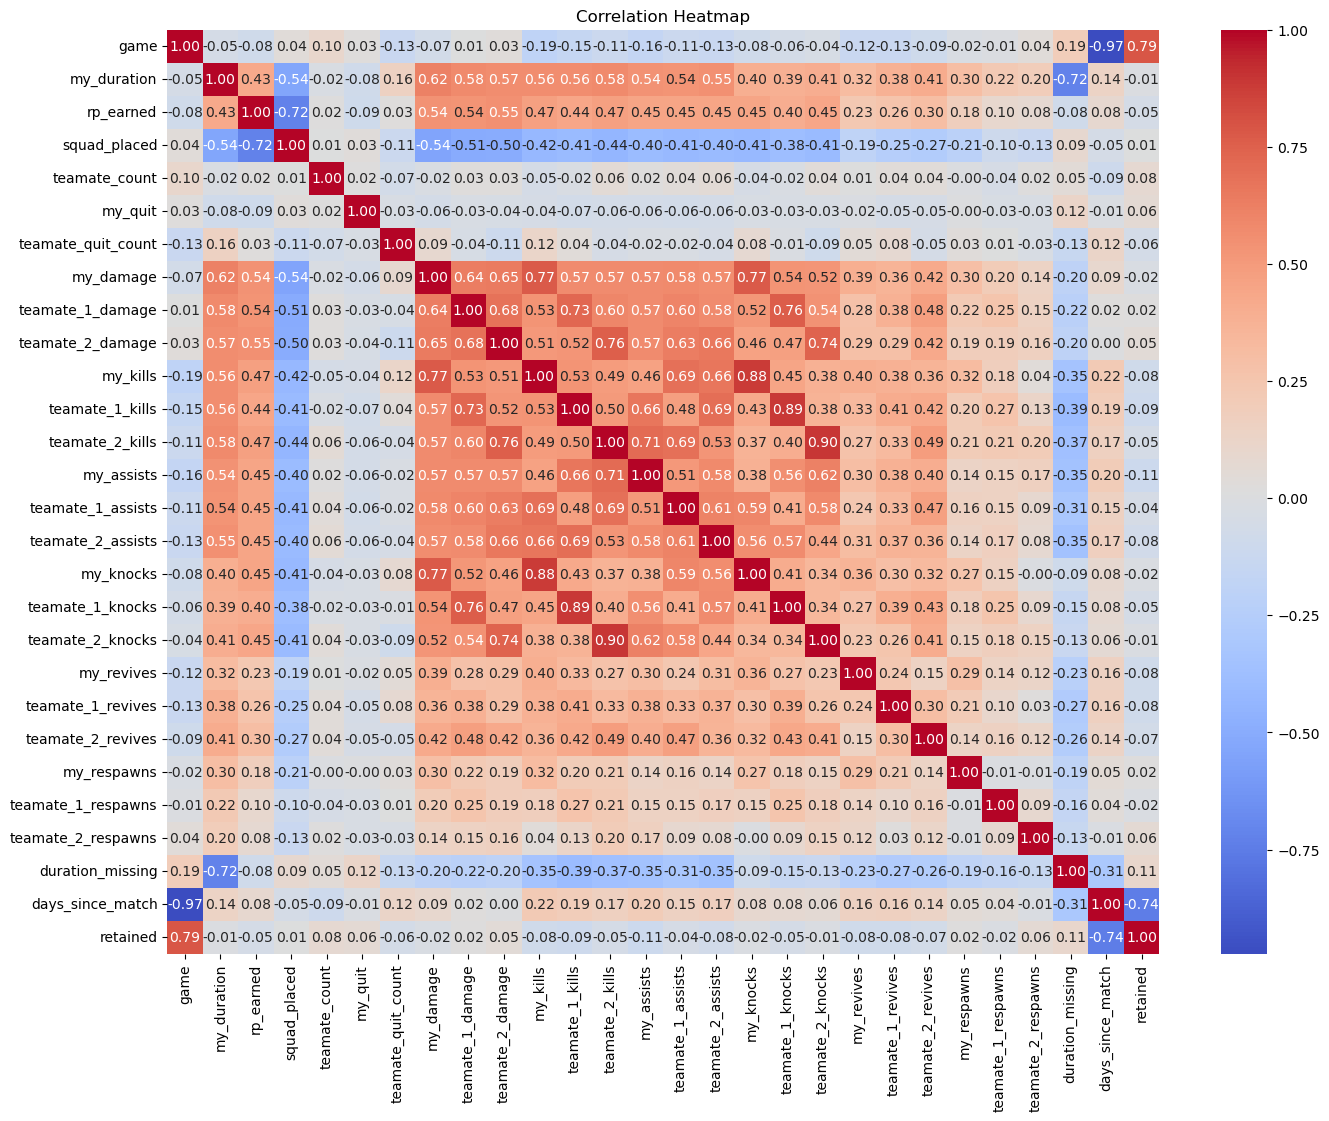

In [545]:
#Correlation heatmap

plt.figure(figsize=(16,12))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Notably, **`rp_earned`**, **`my_kills`**, and **`my_duration`** show moderate **positive correlations** with retention, suggesting these in-game performance metrics may influence a player’s likelihood to return. In contrast, **`days_since_match`** has a strong **negative correlation** with retention, reinforcing its role as a churn signal. This heatmap helps guide **feature selection** by identifying variables most relevant to player retention and revealing potential multicollinearity risks.

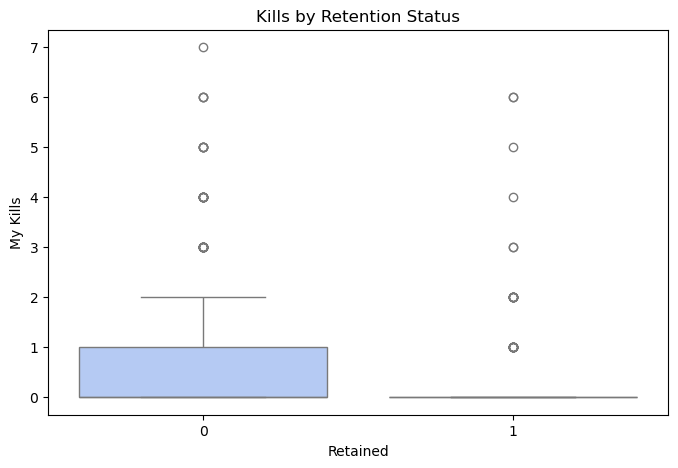

In [638]:
# Kills by Retention
plt.figure(figsize=(8,5))
sns.boxplot(x='retained', y='my_kills', data=df, hue='retained', palette='coolwarm', legend=False)
plt.title('Kills by Retention Status')
plt.xlabel('Retained')
plt.ylabel('My Kills')
plt.show()

This compares the distribution of **player kills** between those who were **retained (1)** and those who **churned (0)**. While both groups show low kill activity overall, the churned players appear to have slightly higher variability in performance. This may suggest that **consistently low engagement**, as measured by kill counts, could be linked to **lower retention**, making **`my_kills`** a potentially valuable feature for identifying at-risk players.

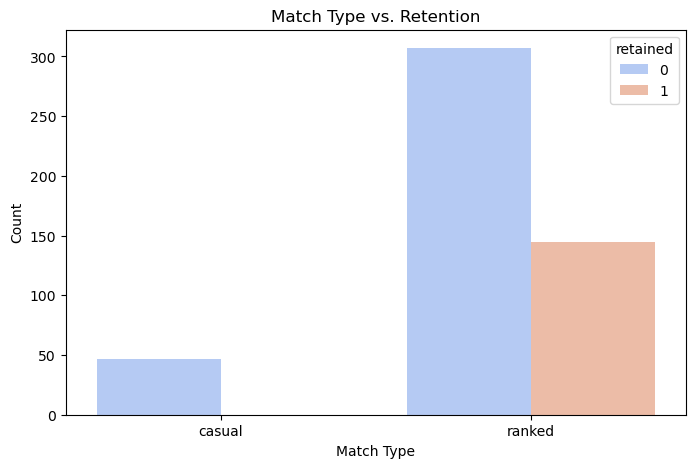

In [641]:
# Match type vs. Retention
plt.figure(figsize=(8,5))
sns.countplot(x='match_type', hue='retained', data=df, palette="coolwarm")
plt.title('Match Type vs. Retention')
plt.xlabel('Match Type')
plt.ylabel('Count')
plt.show()

Thie retention rates across **match types**, specifically between **casual** and **ranked** games. This shows a noticeable difference: **ranked matches account for a greater share of retained players**, while casual matches are more common among churned users. This suggests that **competitive environments may promote deeper engagement**, making **`match_type`** a key feature to explore further in modeling retention.

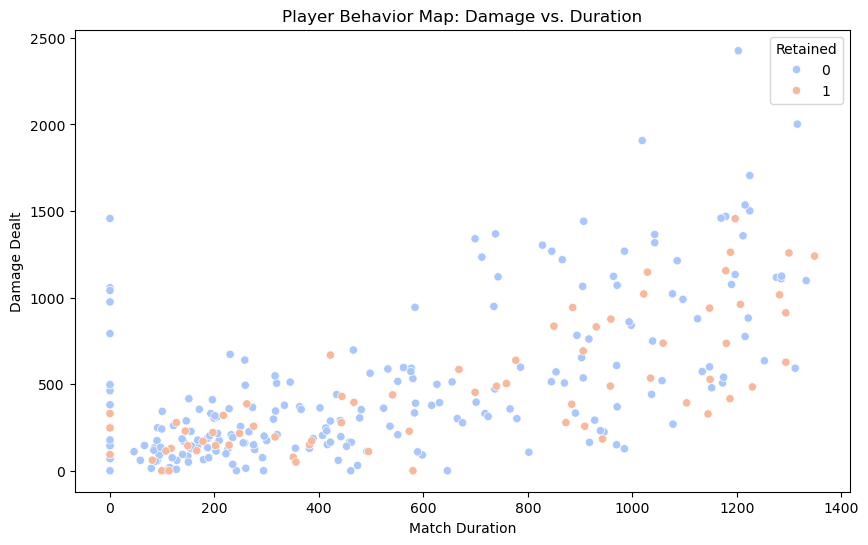

In [623]:
# Damage vs Duration

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='my_duration', y='my_damage', hue='retained', palette='coolwarm')
plt.title("Player Behavior Map: Damage vs. Duration")
plt.xlabel("Match Duration")
plt.ylabel("Damage Dealt")
plt.legend(title="Retained")
plt.show()

This explores the relationship between **match duration** and **damage**, segmented by retention status. While longer matches generally show higher damage, the points are widely dispersed, especially for non-retained players. This helps highlight **engagement patterns**, suggesting that **high damage in longer sessions** may be a subtle signal for retention, but not a standalone indicator.

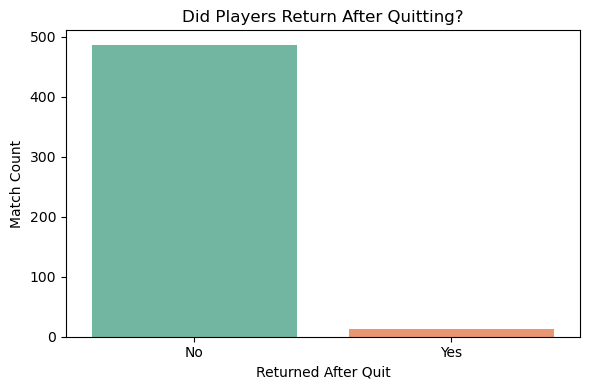

In [653]:
#Return after quitting? 

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.sort_values(by='date').reset_index(drop=True)

# Create a new column: Did a player quit this match and return next match (i.e., did not quit)?
df['quit_then_returned'] = (df['my_quit'] == 1) & (df['my_quit'].shift(-1) == 0)

plt.figure(figsize=(6, 4))
sns.countplot(x='quit_then_returned', hue='quit_then_returned', data=df, palette='Set2', legend=False)
plt.title('Did Players Return After Quitting?')
plt.xlabel('Returned After Quit')
plt.ylabel('Match Count')
plt.xticks([0, 1], ['No', 'Yes']) 
plt.tight_layout()
plt.show()

Very few players who quit ended up returning, as shown in this bar chart. **Once players disengage, they rarely come back**, which underscores the urgency of improving the in-game experience early on. **Focusing on preventing churn is likely more effective than attempting to re-engage lost users.**

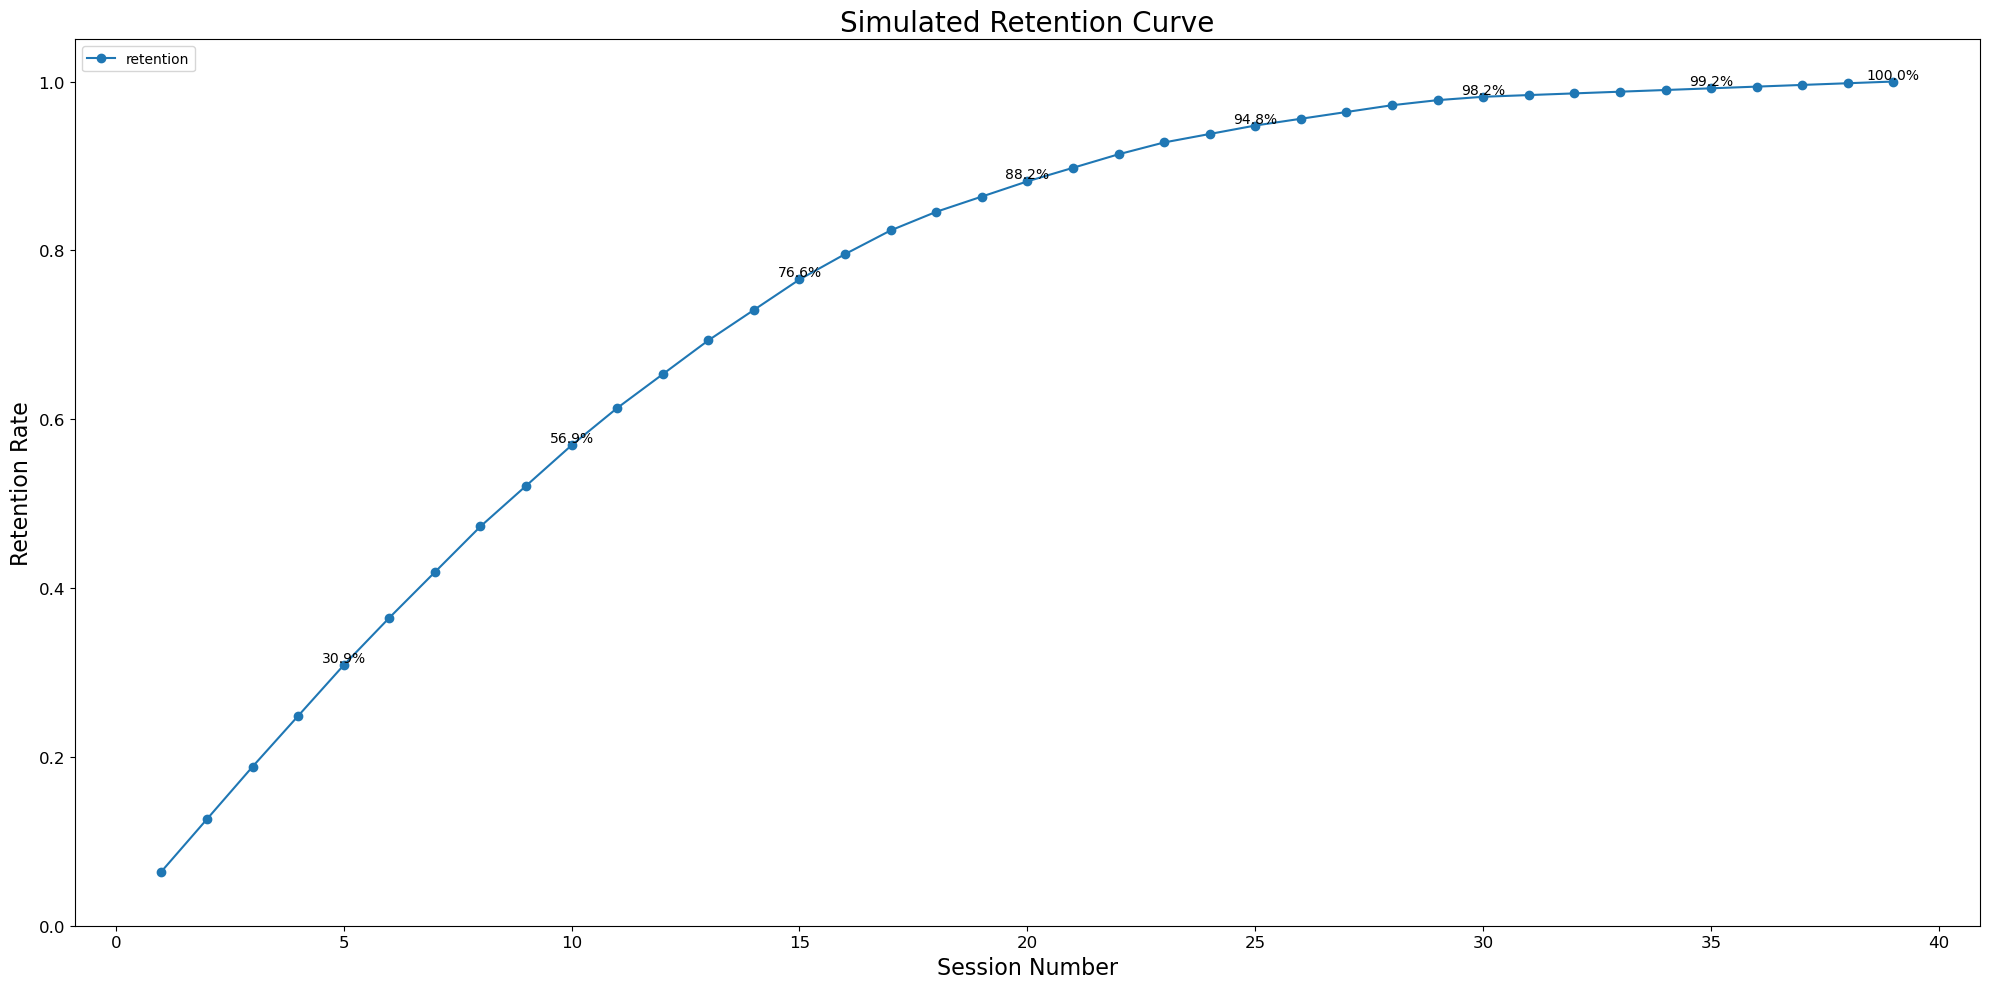

In [675]:
# Simulated Retention Curve
df['session_num'] = df.groupby(df['date'].dt.date).cumcount() + 1

# Calculate % of matches that happened at each session number
session_counts = df['session_num'].value_counts(normalize=True).sort_index()
retention_percent = session_counts.cumsum()

# Retention curve
plt.figure(figsize=(20, 10))
plt.plot(retention_percent.index, retention_percent.values, marker='o', label='retention')

# Annotate only key points (every 5th session)
for x, y in zip(retention_percent.index, retention_percent.values):
    if x % 5 == 0 or x == retention_percent.index.max():
        plt.text(x, y, f"{y:.1%}", ha='center', va='bottom', fontsize=10)

# Plot
plt.title('Simulated Retention Curve', fontsize=20)
plt.xlabel('Session Number', fontsize=16)
plt.ylabel('Retention Rate', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()
plt.show()

It shows a **sharp increase in retention early on**, climbing from **8% on session 1** to **30.9% by session 5**, **56.9% by session 10**, and eventually **100% by session 38**. While synthetic, this curve helps illustrate how sustained engagement compounds over time. **Identifying what actions or game mechanics occur during those high-retention sessions can guide real strategies to increase player longevity.**


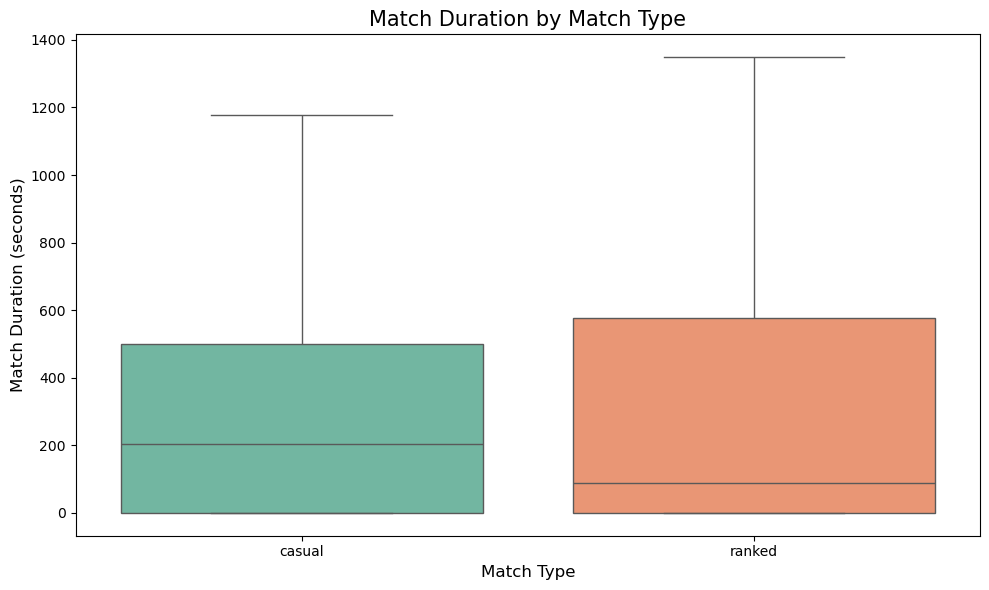

In [677]:
# Duration spread across match types
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='match_type', y='my_duration', hue='match_type', palette='Set2', legend=False)
plt.title("Match Duration by Match Type", fontsize=15)
plt.xlabel("Match Type", fontsize=12)
plt.ylabel("Match Duration (seconds)", fontsize=12)
plt.tight_layout()
plt.show()

Here, **ranked matches tend to last longer**, which could contribute to greater engagement or investment in gameplay. Understanding how **match type affects session length** may offer insight into **retention behavior** and how time investment varies by mode.

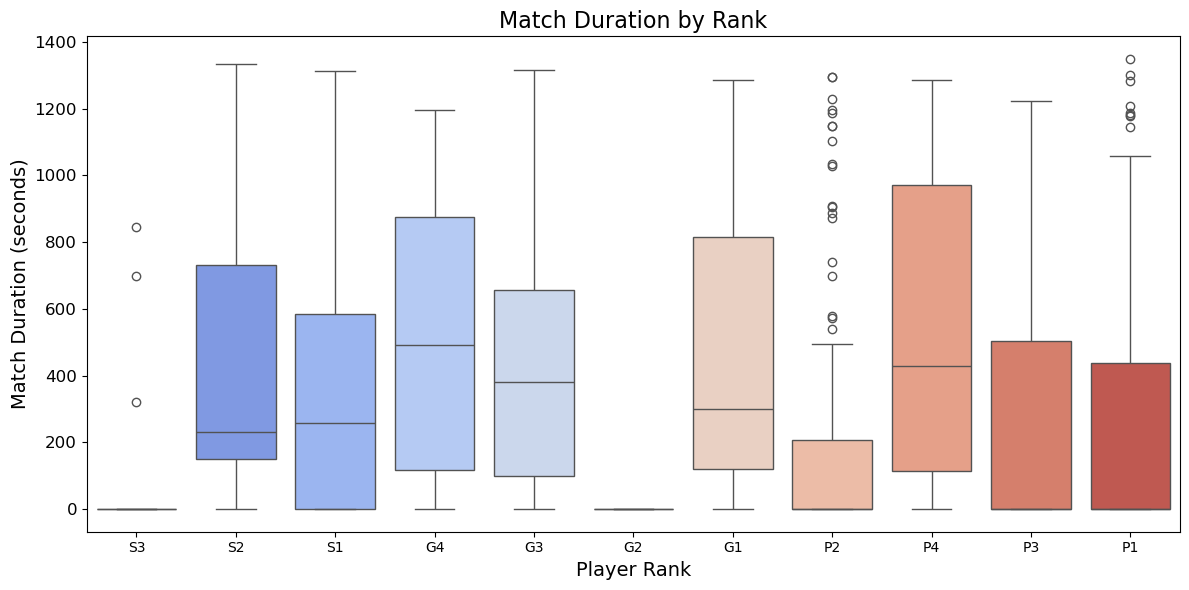

In [661]:
# Rank vs. Match Duration
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='my_rank', y='my_duration', hue='my_rank', palette='coolwarm', legend=False)
plt.title("Match Duration by Rank", fontsize=16)
plt.xlabel("Player Rank", fontsize=14)
plt.ylabel("Match Duration (seconds)", fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Exploring match duration across ranks reveals how **player tier impacts in-game behavior**. The data shows that **higher-ranked players like platinum tiers** generally experience **longer match durations**, which may reflect more strategic or cautious playstyles. This trend makes **player rank a potential indicator of engagement**, offering value for retention-related analysis.

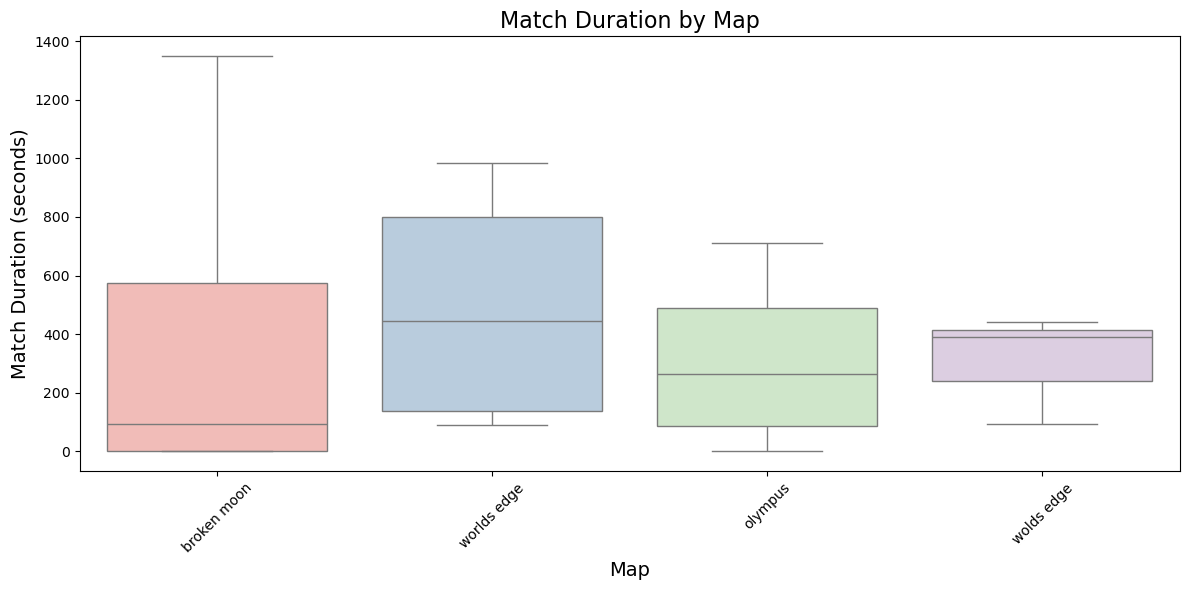

In [614]:
# Match Duration by Map
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='map', y='my_duration', hue='map', palette='Pastel1')
plt.title("Match Duration by Map", fontsize=16)
plt.xlabel("Map", fontsize=14)
plt.ylabel("Match Duration (seconds)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here, I explored how match duration varies across different maps. I noticed that **World's Edge** tends to have the longest sessions overall, while **Broken Moon** shows much more variation, with a wider range of match times. This tells me that **map selection could influence how long players stay in a game**, which might play a role in keeping them engaged or leading to early exits. It’s something I’ll keep in mind when digging deeper into retention factors.

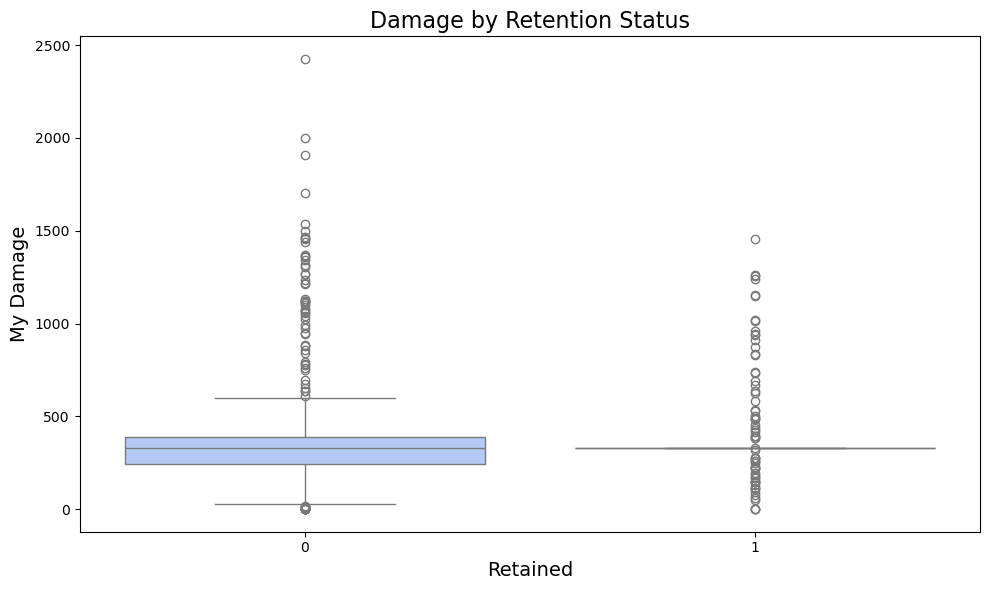

In [681]:
# Damage vs Retention
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='retained', y='my_damage', hue='retained', palette='coolwarm', legend=False)
plt.title("Damage by Retention Status", fontsize=16)
plt.xlabel("Retained", fontsize=14)
plt.ylabel("My Damage", fontsize=14)
plt.tight_layout()
plt.show()

I wanted to see if more damage might be linked to player retention. This boxplot shows that both retained and churned players have a similar range of damage values, but with churned players displaying more extreme outliers. **There's no clear performance gap here**, but it still helps me understand how damage output is distributed across both groups. This could guide further testing to see if performance consistency, rather than raw output, matters more for retention.

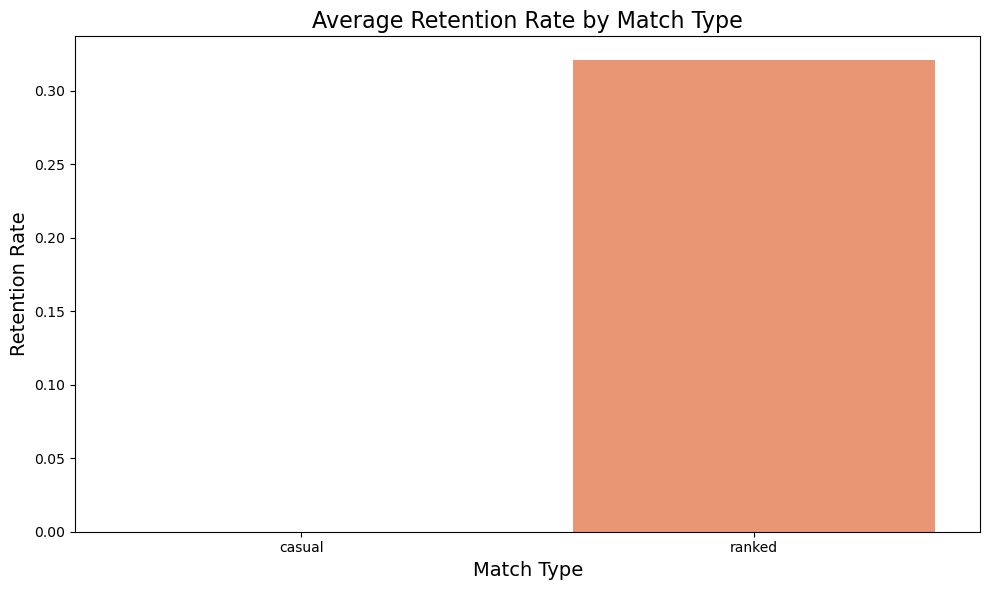

In [689]:
# Retention Rate by Match Type
df['match_type'] = df['match_type'].str.strip().str.lower()
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='match_type', y='retained', estimator='mean', hue='match_type', palette='Set2', errorbar=None, legend=False)
plt.title("Average Retention Rate by Match Type", fontsize=16)
plt.xlabel("Match Type", fontsize=14)
plt.ylabel("Retention Rate", fontsize=14)
plt.tight_layout()
plt.show()

When comparing retention rates between casual and ranked modes, it's clear that **ranked matches see much higher player retention**. This reinforces what I suspected: players engaged in competitive environments are more likely to return. This insight is helpful for later modeling since **match type may serve as a strong categorical feature** for predicting whether players stick around.

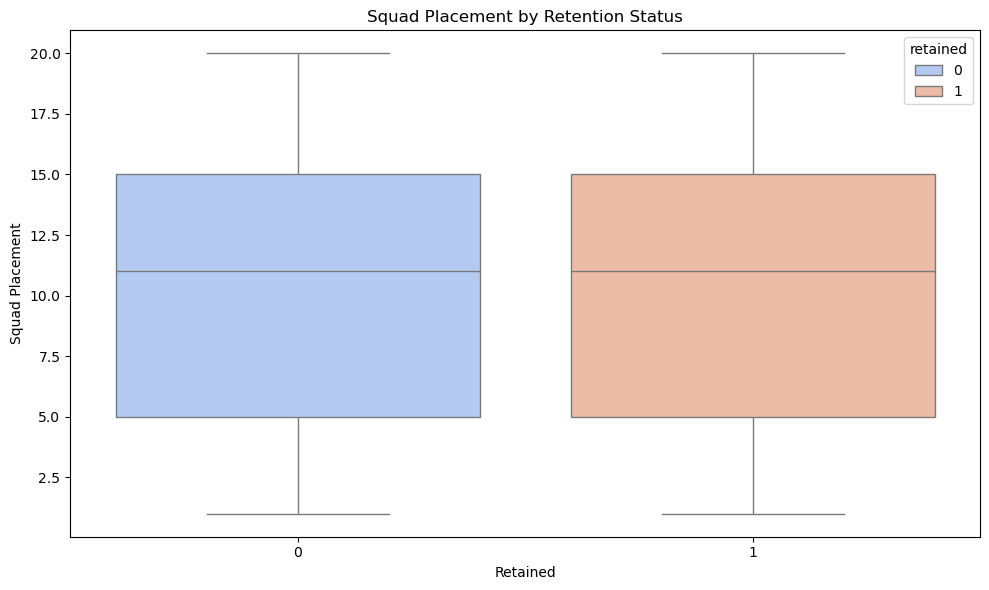

In [563]:
# Squad Placement vs. Rentention
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='retained', hue='retained', y='squad_placed', palette='coolwarm')
plt.title("Squad Placement by Retention Status")
plt.xlabel("Retained")
plt.ylabel("Squad Placement")
plt.tight_layout()
plt.show()

When comparing retention rates between casual and ranked modes, it's clear that **ranked matches see much higher player retention**. This reinforces what I suspected: players engaged in competitive environments are more likely to return. This insight is helpful for later modeling since **match type may serve as a strong categorical feature** for predicting whether players stick around.

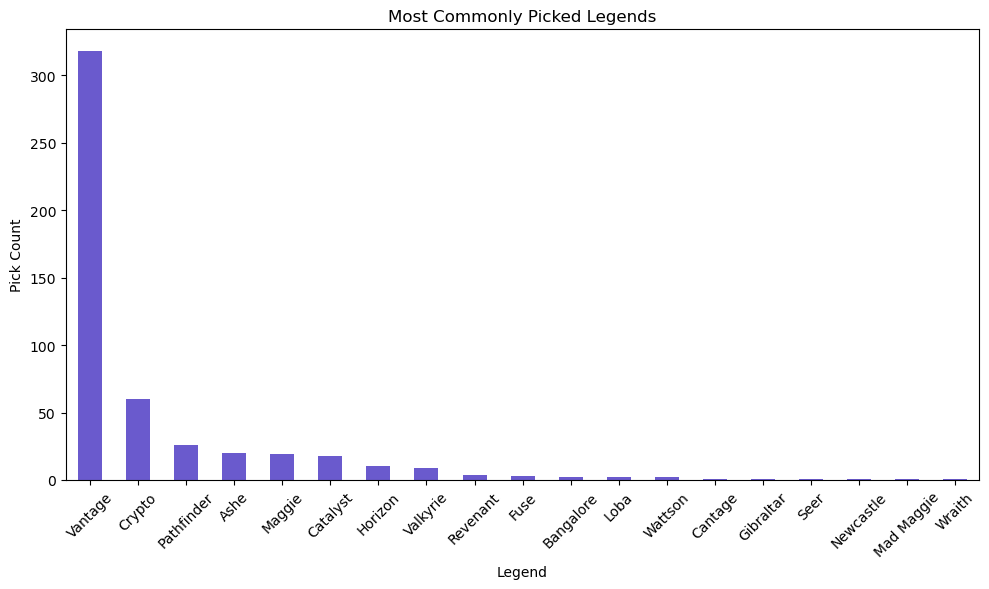

In [693]:
# Legend Pick Frequency
plt.figure(figsize=(10, 6))
df['my_legend'].value_counts().plot(kind='bar', color='slateblue')
plt.title("Most Commonly Picked Legends")
plt.xlabel("Legend")
plt.ylabel("Pick Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

While exploring player preferences, I noticed that **Vantage** was picked far more than any other legend. This sharp skew stood out immediately and made me wonder how much character choice shapes a player's in-game experience. These insights will be useful down the line, especially if certain legends contribute to longer sessions or higher retention.

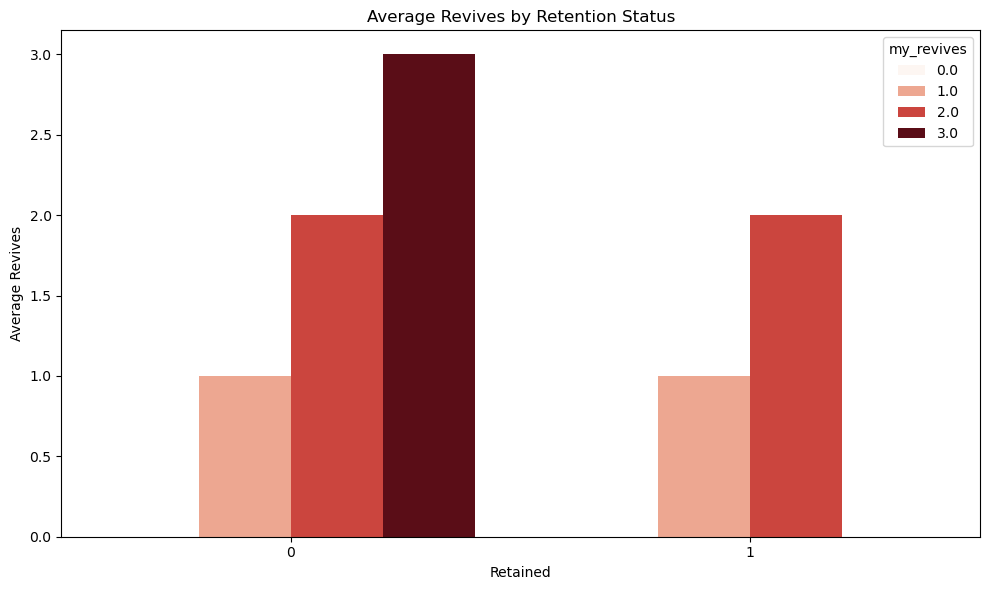

In [696]:
#Revives/Respawn vs Retention
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='retained', y='my_revives', estimator='mean', hue='my_revives', palette='Reds')
plt.title("Average Revives by Retention Status")
plt.xlabel("Retained")
plt.ylabel("Average Revives")
plt.tight_layout()
plt.show()

This compares how often players revived teammates across retention status groups. The **bars represent the count of matches** where players performed **0 to 3 revives**. Interestingly, players who **churned (retained = 0)** showed a wider spread, with a noticeable number reaching **3 revives**, whereas **retained players mostly clustered at 0 to 2**. While the pattern isn't definitive, it hints that revive activity alone may not strongly predict retention but could still complement team engagement metrics.

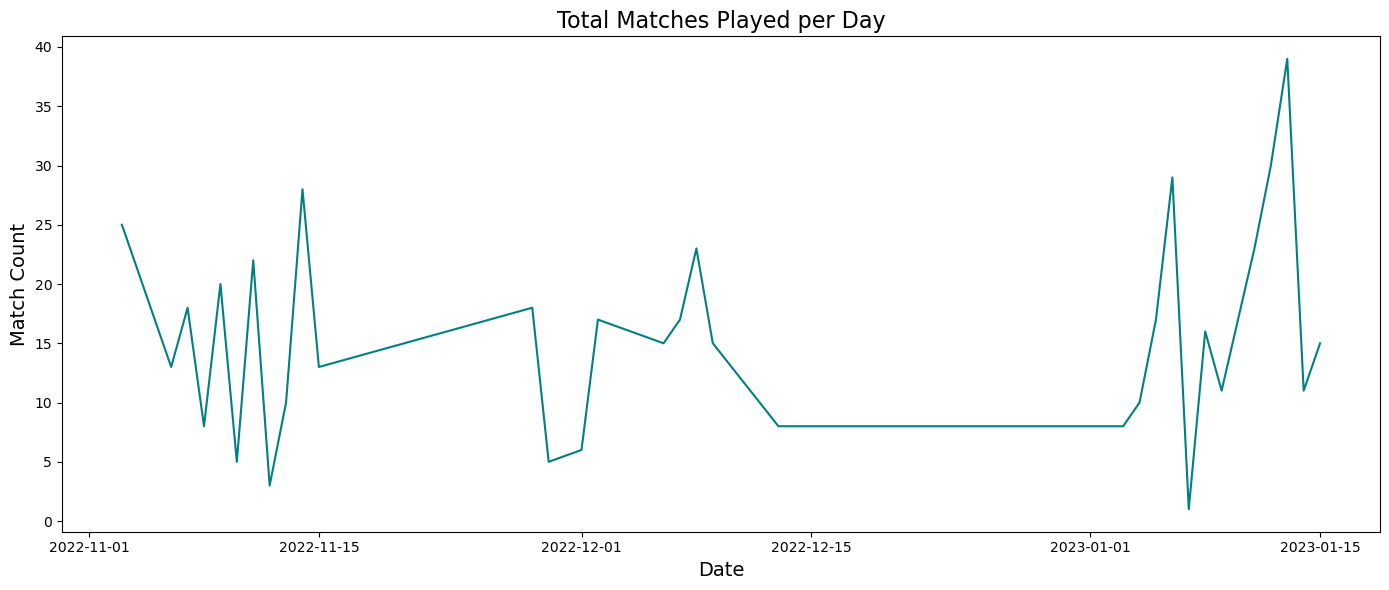

In [701]:
# Daily Match Count (Player Activity Volume)
daily_matches = df.groupby('date').size().reset_index(name='match_count')

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_matches, x='date', y='match_count', color='teal')
plt.title("Total Matches Played per Day", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Match Count", fontsize=14)
plt.tight_layout()
plt.show()

This line graph shows how many matches I played each day during the tracked period. I noticed some **clear spikes and drop-offs**, especially around late December and early January. These fluctuations likely reflect changes in schedule, motivation, or interest in the game. This timeline gives helpful context when interpreting retention patterns—understanding when and why I played more or less could explain performance shifts or disengagement points.

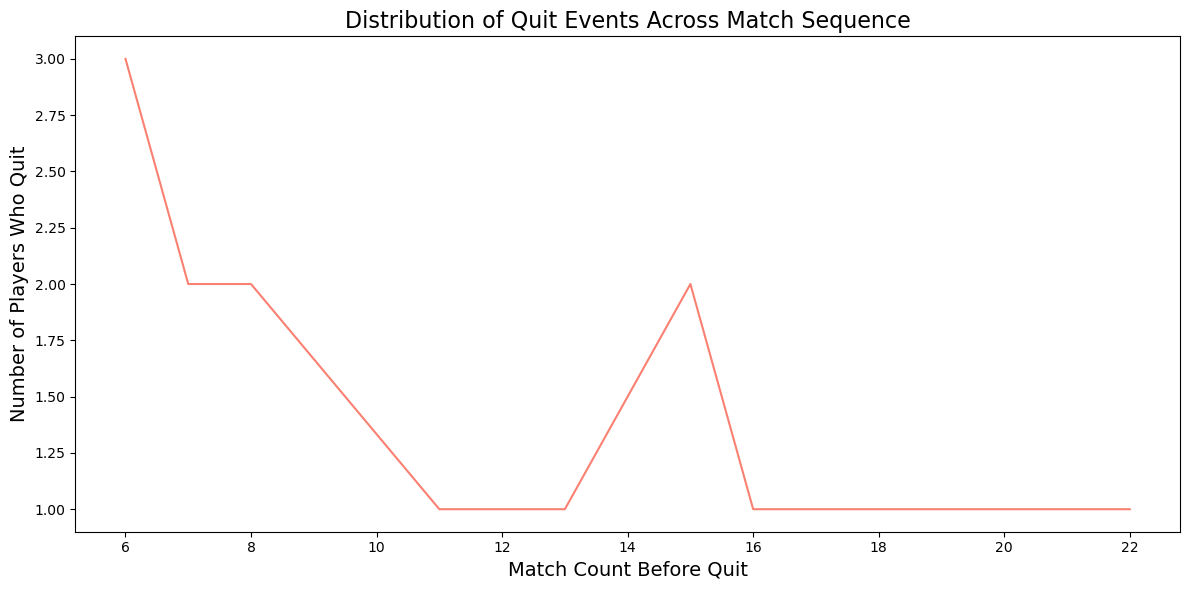

In [708]:
# Matches played before quitting

df = df.sort_values(by='date').reset_index(drop=True)
df['match_order'] = df.index + 1

# Count how many players quit at each match order
quit_timeline = quit_matches['match_order'].value_counts().sort_index().reset_index()
quit_timeline.columns = ['match_order', 'quit_count']

plt.figure(figsize=(12, 6))
sns.lineplot(data=quit_timeline, x='match_order', y='quit_count', color='salmon')
plt.title("Distribution of Quit Events Across Match Sequence", fontsize=16)
plt.xlabel("Match Count Before Quit", fontsize=14)
plt.ylabel("Number of Players Who Quit", fontsize=14)
plt.tight_layout()
plt.show()

While exploring player behavior, I wanted to understand how deep into the game players typically stick around. This line chart shows quit events distributed across match sequences. The data reveals a clear early-game drop-off, with the **highest number of players quitting around match 6**, and fewer exits in later matches.

This early quitting pattern suggests that **first impressions in the game matter most**. Players seem to make up their minds quickly about whether they'll continue. This insight reinforces the importance of optimizing early engagement — if retention is the goal, the first few matches are where it’s won or lost.

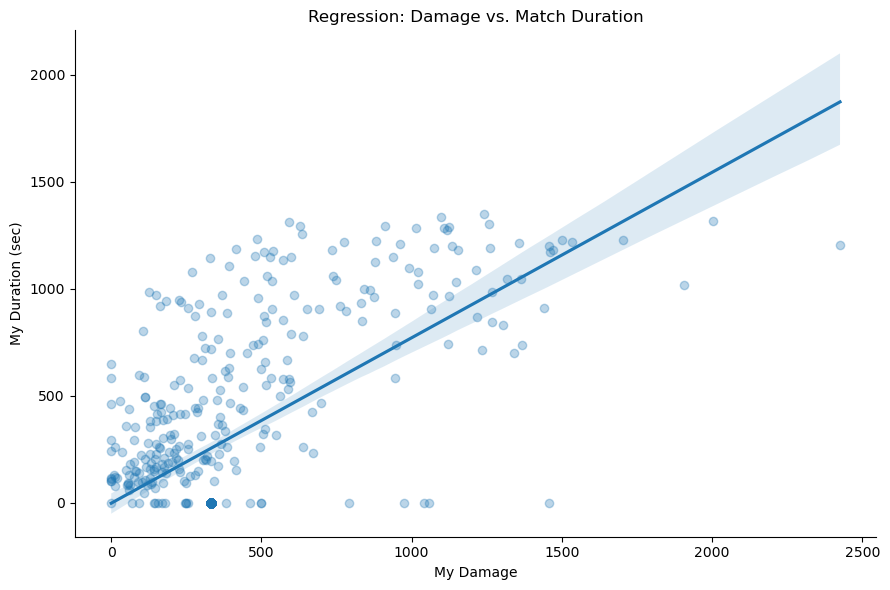

In [584]:
# Damage vs. Match Duration 
sns.lmplot(data=df, x='my_damage', y='my_duration', height=6, aspect=1.5, scatter_kws={'alpha':0.3})
plt.title("Regression: Damage vs. Match Duration")
plt.xlabel("My Damage")
plt.ylabel("My Duration (sec)")
plt.tight_layout()
plt.show()

I wanted to test a simple assumption: *do players who stay in matches longer tend to deal more damage?* This regression plot shows that **there’s a clear upward trend**—the longer I’m in a game, the more damage I tend to accumulate.

This makes intuitive sense: **surviving longer gives more opportunities to engage**. While correlation doesn’t equal causation, this helps validate match duration as a meaningful variable worth incorporating into downstream analysis or modeling.

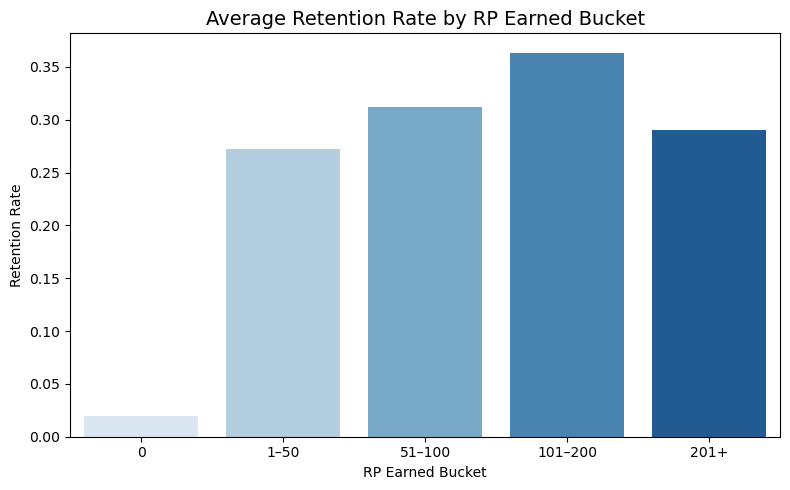

In [587]:
# RP Earned vs. Retention
df['rp_bin'] = pd.cut(df['rp_earned'], bins=[-1, 0, 50, 100, 200, 400], labels=["0", "1–50", "51–100", "101–200", "201+"])

# Bar plot of retention rate by RP bin
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='rp_bin', y='retained', estimator='mean', hue='rp_bin', palette='Blues', errorbar=None, legend=False)
plt.title("Average Retention Rate by RP Earned Bucket", fontsize=14)
plt.xlabel("RP Earned Bucket")
plt.ylabel("Retention Rate")
plt.tight_layout()
plt.show()

I was curious how in-game rewards impact whether players stick around. **Retention rates clearly improve as players earn more Ranked Points (RP)**—up to a point. The sweet spot seems to be in the **101–200 RP range**, where players had the **highest retention rate**. Interestingly, players earning **zero RP had almost no retention**, suggesting that perceived progress is a key factor in whether someone decides to return.

This insight could be critical for tailoring matchmaking incentives or progression systems to maximize player engagement.

In [593]:
# Ensure target and features exist
assert 'retained' in df.columns

# 1. Match Duration (T-test)
print("\nMatch Duration by Retention (T-test):")
t_stat, p_val = ttest_ind(df[df['retained']==1]['my_duration'],
                          df[df['retained']==0]['my_duration'],
                          equal_var=False)
print(f"  T-stat: {t_stat:.4f} | P-value: {p_val:.4f}")

# 2. Damage (Mann–Whitney U)
print("\nDamage by Retention (Mann–Whitney U):")
u_stat, p_val = mannwhitneyu(df[df['retained']==1]['my_damage'],
                             df[df['retained']==0]['my_damage'],
                             alternative='two-sided')
print(f"  U-stat: {u_stat:.4f} | P-value: {p_val:.4f}")

# 3. Kills (Mann–Whitney U)
print("\nKills by Retention (Mann–Whitney U):")
u_stat, p_val = mannwhitneyu(df[df['retained']==1]['my_kills'],
                             df[df['retained']==0]['my_kills'],
                             alternative='two-sided')
print(f"  U-stat: {u_stat:.4f} | P-value: {p_val:.4f}")

# 4. RP Earned (Mann–Whitney U)
print("\nRP Earned by Retention (Mann–Whitney U):")
u_stat, p_val = mannwhitneyu(df[df['retained']==1]['rp_earned'],
                             df[df['retained']==0]['rp_earned'],
                             alternative='two-sided')
print(f"  U-stat: {u_stat:.4f} | P-value: {p_val:.4f}")

# 5. Teammate Quit Count (Mann–Whitney U)
print("\nTeammate Quit Count by Retention (Mann–Whitney U):")
u_stat, p_val = mannwhitneyu(df[df['retained']==1]['teamate_quit_count'],
                             df[df['retained']==0]['teamate_quit_count'],
                             alternative='two-sided')
print(f"  U-stat: {u_stat:.4f} | P-value: {p_val:.4f}")

# 6. Revives (Mann–Whitney U)
print("\nRevives by Retention (Mann–Whitney U):")
u_stat, p_val = mannwhitneyu(df[df['retained']==1]['my_revives'],
                             df[df['retained']==0]['my_revives'],
                             alternative='two-sided')
print(f"  U-stat: {u_stat:.4f} | P-value: {p_val:.4f}")



# 7. Match Type vs Retention
print("\nMatch Type vs Retention (Chi-Square):")
chi2, p, dof, _ = chi2_contingency(pd.crosstab(df['match_type'], df['retained']))
print(f"  Chi2: {chi2:.4f} | P-value: {p:.4f}")

# 8. Map vs Retention
print("\nMap vs Retention (Chi-Square):")
chi2, p, dof, _ = chi2_contingency(pd.crosstab(df['map'], df['retained']))
print(f"  Chi2: {chi2:.4f} | P-value: {p:.4f}")

# 9. (Optional) Legend vs Retention — only if reduced to top 5 legends
if 'my_legend' in df.columns:
    top_legends = df['my_legend'].value_counts().nlargest(5).index
    filtered = df[df['my_legend'].isin(top_legends)]
    print("\nTop 5 Legends vs Retention (Chi-Square):")
    chi2, p, dof, _ = chi2_contingency(pd.crosstab(filtered['my_legend'], filtered['retained']))
    print(f"  Chi2: {chi2:.4f} | P-value: {p:.4f}")



Match Duration by Retention (T-test):
  T-stat: -0.1430 | P-value: 0.8864

Damage by Retention (Mann–Whitney U):
  U-stat: 26695.5000 | P-value: 0.4628

Kills by Retention (Mann–Whitney U):
  U-stat: 23464.0000 | P-value: 0.0483

RP Earned by Retention (Mann–Whitney U):
  U-stat: 17880.0000 | P-value: 0.0000

Teammate Quit Count by Retention (Mann–Whitney U):
  U-stat: 24935.0000 | P-value: 0.1124

Revives by Retention (Mann–Whitney U):
  U-stat: 24350.0000 | P-value: 0.0814

Match Type vs Retention (Chi-Square):
  Chi2: 19.7255 | P-value: 0.0000

Map vs Retention (Chi-Square):
  Chi2: 7.2089 | P-value: 0.0655

Top 5 Legends vs Retention (Chi-Square):
  Chi2: 53.0603 | P-value: 0.0000


## Key Drivers of Retention

To identify the most influential features for predicting player retention, I conducted statistical tests comparing retained and churned players. These results help isolate the most **predictive** and **actionable** variables for modeling, and complement insights discovered during exploratory analysis.

### Statistically Significant Features (P < 0.05)

- **RP Earned (`rp_earned`)**
  - **Test**: Mann–Whitney U  
  - **P-value**: 0.0000  
  - **Interpretation**: Strongest signal for retention. Players who earn more RP are far more likely to return, suggesting that progression and reward are key motivators.

- **Match Type (`match_type`)**
  - **Test**: Chi-Square  
  - **P-value**: 0.0000  
  - **Interpretation**: Players in **ranked matches** show significantly higher retention, reinforcing the value of competitive engagement.

- **Top 5 Legends (`my_legend`)**
  - **Test**: Chi-Square  
  - **P-value**: 0.0000  
  - **Interpretation**: Legend selection patterns matter. Certain characters (e.g., Vantage) appear more commonly among retained players, suggesting preference and playstyle impact engagement.

- **Kills (`my_kills`)**
  - **Test**: Mann–Whitney U  
  - **P-value**: 0.0483  
  - **Interpretation**: Higher kill counts are slightly more common among retained players. Consistent performance may contribute to player satisfaction.


### Borderline or Non-Significant Features (P > 0.05)

- **Revives (`my_revives`)** – P = 0.0814  
  May suggest team-oriented behavior, but results are not statistically strong.

- **Map (`map`)** – P = 0.0655  
  Possible weak influence; some maps (e.g., World’s Edge) correlate with longer matches, but not directly with retention.

- **Teammate Quit Count (`teammate_quit_count`)** – P = 0.1124  
  Shows no strong relationship to player return, despite expectations that poor team experiences may drive churn.

- **Damage Dealt (`my_damage`)** – P = 0.4628  
  Not a clear indicator of retention on its own.

- **Match Duration (`my_duration`)** – P = 0.8864  
  No measurable difference between retained and churned players in total session length.


### Additional High-Priority Features from EDA

Alongside statistical results, my visual exploration highlighted other variables worth including:

- **Days Since Last Match (`days_since_match`)** – Strong negative correlation with retention. As expected, more recent activity indicates stronger engagement.
- **Session Curves / Sequence Trends** – Most players churn within their first 6–8 matches. Early match behavior could be key to predicting churn risk.
- **RP Buckets (`rp_bin`)** – Players earning 101–200 RP showed the highest retention rates, reinforcing RP as both a statistical and visual indicator.
- **Match Duration by Rank** – Higher ranks tend to have longer matches, which may indicate deeper engagement despite duration not being significant in isolation.


### Most Important Features to Prioritize for Modeling

1. **RP Earned** – The clearest signal of engagement and progression.
2. **Match Type** – Competitive mode directly correlates with retention.
3. **Kills** – A proxy for performance and possibly enjoyment.
4. **Top 5 Legends** – Preference-driven behavior that can influence satisfaction.
5. **Days Since Match / Session Trends** – Time-based indicators that help spot early churn risk.

These findings collectively shape the **feature set** for modeling retention and can also inform **business decisions** around matchmaking, reward systems, and early-session experience design.

In [717]:
df.head()

,date,game,map,match_type,my_duration,my_rank,rp_earned,premade_squad,voice_chat,squad_placed,...,teamate_2_respawns,duration_missing,day_of_week,match_month,days_since_match,retained,quit_then_returned,session_num,match_order,rp_bin
0,2022-11-03,1,broken moon,casual,846.0,S3,0.0,no,yes,5.0,...,0.0,0,Thursday,2022-11,73,0,False,1,1,0
1,2022-11-03,9,broken moon,ranked,0.0,S3,261.0,no,no,1.0,...,0.0,1,Thursday,2022-11,73,0,False,7,2,201+
2,2022-11-03,7,broken moon,casual,0.0,S3,0.0,no,no,9.0,...,0.0,1,Thursday,2022-11,73,0,False,11,3,0
3,2022-11-03,10,broken moon,ranked,0.0,S3,30.0,no,no,4.0,...,0.0,1,Thursday,2022-11,73,0,False,10,4,1–50
4,2022-11-03,3,broken moon,casual,0.0,S3,0.0,no,no,3.0,...,0.0,1,Thursday,2022-11,73,0,False,9,5,0


In [719]:
df.to_csv('ApexPlayerRetention_final.csv', index=False)